In [1]:
import numpy as np
import pickle
from sklearn.datasets import load_breast_cancer
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from ncart import NCARClassifier

/home/sx59/anaconda3/envs/py310/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
data = load_breast_cancer()  
X = data.data.astype(np.float32)
y = data.target
feature_names = data.feature_names

In [3]:
model = NCARClassifier(epochs=100, n_trees=8, n_layers=2, n_selected=6, use_gpu=False)
model.fit(X, y)

On Device:  cpu
Binary classification
Epoch 0: Train Loss 0.834447
Epoch 1: Train Loss 0.829609
Epoch 2: Train Loss 0.824868
Epoch 3: Train Loss 0.820317
Epoch 4: Train Loss 0.815899
Epoch 5: Train Loss 0.811474
Epoch 6: Train Loss 0.807176
Epoch 7: Train Loss 0.803059
Epoch 8: Train Loss 0.799065
Epoch 9: Train Loss 0.795084
Epoch 10: Train Loss 0.791163
Epoch 11: Train Loss 0.787332
Epoch 12: Train Loss 0.783566
Epoch 13: Train Loss 0.779879
Epoch 14: Train Loss 0.776252
Epoch 15: Train Loss 0.772663
Epoch 16: Train Loss 0.769125
Epoch 17: Train Loss 0.765641
Epoch 18: Train Loss 0.762308
Epoch 19: Train Loss 0.759021
Epoch 20: Train Loss 0.755786
Epoch 21: Train Loss 0.752604
Epoch 22: Train Loss 0.749478
Epoch 23: Train Loss 0.746405
Epoch 24: Train Loss 0.743385
Epoch 25: Train Loss 0.740409
Epoch 26: Train Loss 0.737477
Epoch 27: Train Loss 0.734606
Epoch 28: Train Loss 0.731744
Epoch 29: Train Loss 0.728936
Epoch 30: Train Loss 0.726164
Epoch 31: Train Loss 0.723427
Epoch 32: Tr

([0.8344471454620361,
  0.8296093940734863,
  0.8248680233955383,
  0.8203167915344238,
  0.8158989548683167,
  0.8114740252494812,
  0.8071756362915039,
  0.8030593395233154,
  0.7990645170211792,
  0.7950840592384338,
  0.791163444519043,
  0.7873317003250122,
  0.7835655212402344,
  0.7798793911933899,
  0.776252269744873,
  0.7726631164550781,
  0.7691249251365662,
  0.7656412720680237,
  0.7623077630996704,
  0.7590214014053345,
  0.7557861804962158,
  0.752604067325592,
  0.7494781613349915,
  0.7464048266410828,
  0.7433850169181824,
  0.7404087781906128,
  0.7374773621559143,
  0.7346064448356628,
  0.7317437529563904,
  0.728936493396759,
  0.7261636257171631,
  0.723427414894104,
  0.7207307815551758,
  0.7180637121200562,
  0.7154291272163391,
  0.7128250002861023,
  0.7102474570274353,
  0.7076969742774963,
  0.705176830291748,
  0.7026861906051636,
  0.7002293467521667,
  0.697801411151886,
  0.6953997611999512,
  0.6930223703384399,
  0.6906726360321045,
  0.6883440613746

In [4]:
importance = model.get_importance()

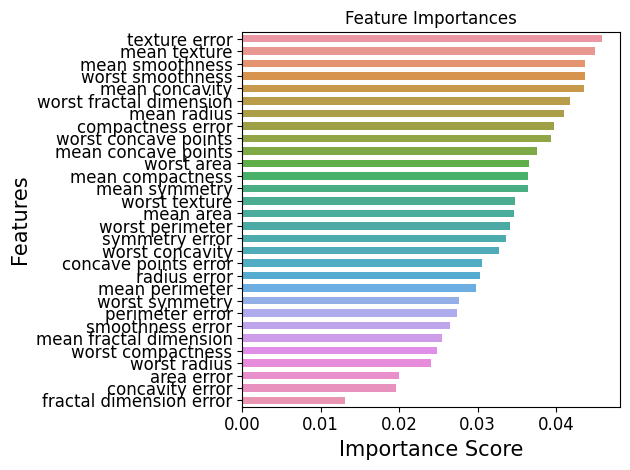

In [5]:
# Create a DataFrame with feature names and importance scores
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances using Seaborn
plt.figure()
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, width=0.6)
plt.title('Feature Importances', fontsize=12)
plt.xlabel('Importance Score', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.tick_params(axis='both', which='major', labelsize=12)
plt.tight_layout()
plt.show()